In [58]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split # to split training and testing
from sklearn import preprocessing #to help standardize data
from sklearn.linear_model import LinearRegression


In [59]:
quandl.ApiConfig.api_key = "VrBC-hAt7hajsNz2HqAn"
df = quandl.get("WIKI/APPL")
df = df[['Adj. Close']] #filtering data frame
df 

NotFoundError: (Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.

In [ ]:
df['Adj. Close'].plot(figsize=(15,6),color='g')
plt.legend(loc = 'upper left')
plt.show() # shows Facebooks cost over the years

In [ ]:
time_forecast = 30
df["Prediction"] = df[['Adj. Close']].shift(-time_forecast) 
# ^ truncated data to allow for validating predictions against pre-provided datapoints
x = np.array(df.drop(["Prediction"],1)) 
# ^ x dataset is Adj. Close (note, len(x dataset) > than len(y dataset) hence we drop points
x = preprocessing.scale(x)
# ^ standizing data (making our sd = 1, u = 0)
X_forecast = x[-time_forecast:]
x = x[:-time_forecast]
# split data based on whetehr or not they have Y values

y = np.array(df['Prediction'])
y = y[:-time_forecast]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = LinearRegression() #classifier
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
forecast_predicted = clf.predict(X_forecast)
forecast_predicted

(17282.0, 17789.9)

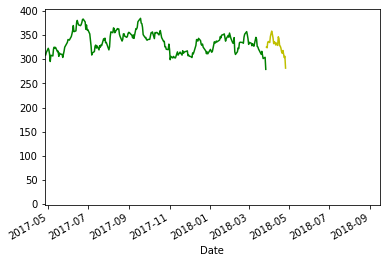

In [61]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26)) #plots our prediction onto the end of the graph
#linear regression isn't great for stocks, but good project